# Установим графическую библиотеку seaborn:

In [1]:
import piplite
await piplite.install('seaborn')

# Импортируем библиотеки:
1. Из библиотки sklearn импортируем уже готовый и очищенный dataset бостон
2. метод train_test_split для разделения датасета на обучающую и тестируемую выборки
3. импортируем линейную модель регрессии

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Создадим объект boston_dataset конструктором класса load_boston:

In [3]:
boston_dataset = load_boston()

/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

Не обращайте внимания на предупреждение, так как в ней говорится, что  Boston housing prices dataset имеет этические проблемы (тупо не актуален сейчас из-за инфляции и т.п.). Но мы его используем для обучения, поэтому нам норм. Просмотрим список объектов текущей локальной области:

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

При необходимости можно просмотреть описание датасета, в котором описаны абсолютно все параметры, с которыми мы дальше будем работать:

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Просмотрим имена столбцов нашей data:

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

А дальше можно просмотреть и само содержимое data.

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Просматриваем список целей (цен недвижимости), для которых мы собственно и создаем нашу модель:

In [8]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Загрузим все данные в dataframe объекта pd, созданный на основе конструктора объектов pd:

In [9]:
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

Просмотрим его:

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Проверим датасет на empty (NULL) значения. В данном датасете их не будет, но в реальной практике их всегда валом.

In [12]:
pd.isnull(data).any

<bound method NDFrame._add_numeric_operations.<locals>.any of       CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO 

Дальше проверяем на типы данных значения всех наших признаков. Помним, что в условиях программирования и машинного обучения мы можем работать только с количественными (но никак не качественными характеристиками).

# Графика:
1. Выведем гистограму распределения количества комнат по домам:

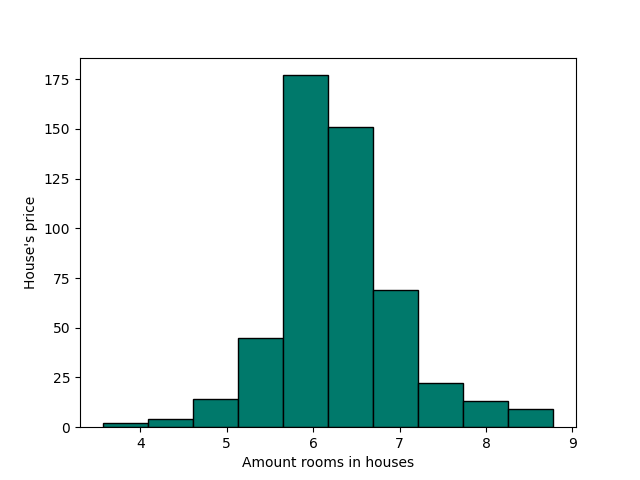

In [15]:
plt.figure()
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Amount rooms in houses')
plt.ylabel('House\'s price')
plt.show()

2. Удаленность от трасс:

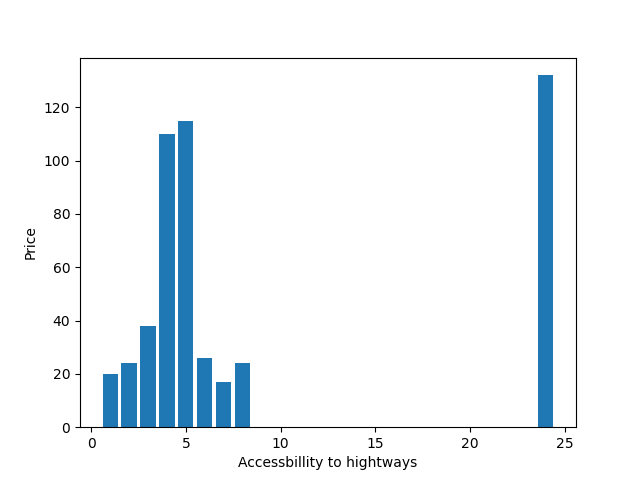

In [17]:
frequency = data['RAD'].value_counts()
plt.figure()
plt.xlabel('Accessbillity to hightways')
plt.ylabel('Price')
plt.bar(frequency.index, height=frequency)
plt.show()

Дальше я вам предлагаю самим вывести все оставшиеся гистограммы признаков. Пока просмотрим основные статистические характеристики:

In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


И коэфициенты корреляции каждого параметра:

In [19]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


В табличном виде такое воспринимать обычно неудобно, поэтому визуализируем его с помощью heatmap

In [21]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

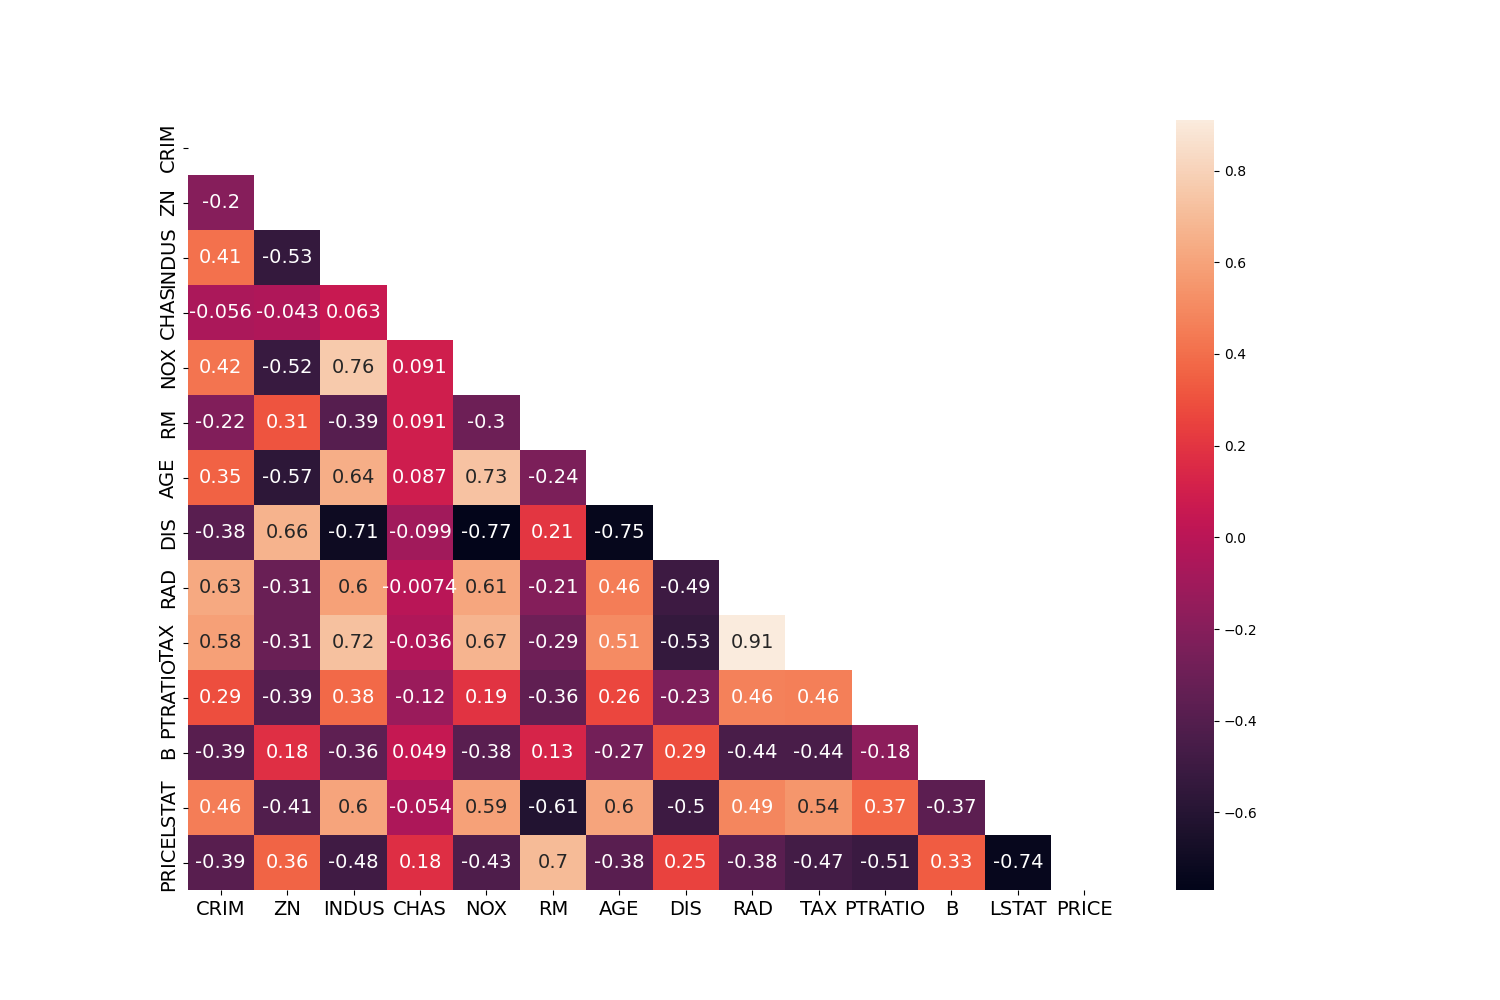

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

3. Построим полигон распределения зависимых переменных:

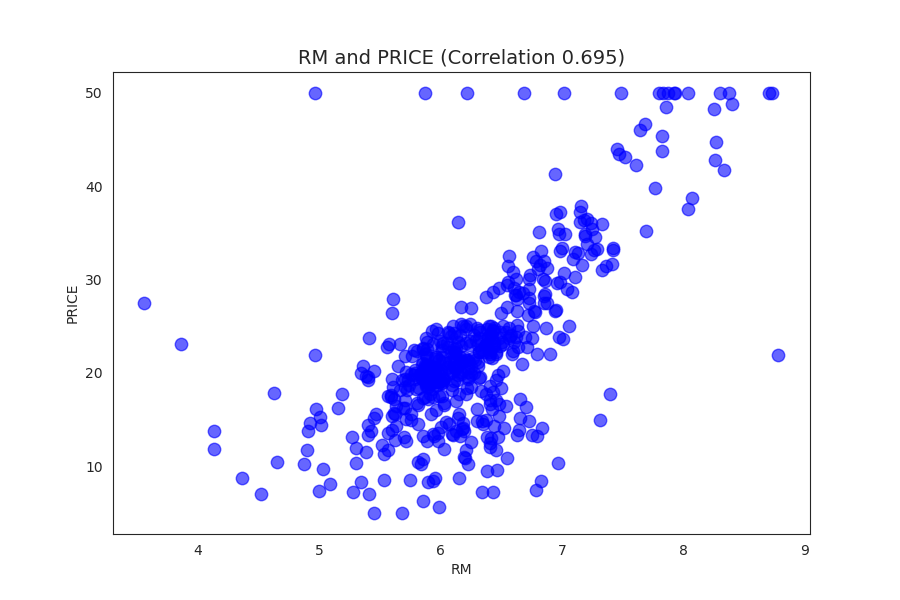

In [24]:
rm_tgt_corr=round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='blue')
plt.title(f'RM and PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

и посмотрим на гистограмму зависимости количества комнат и цены:

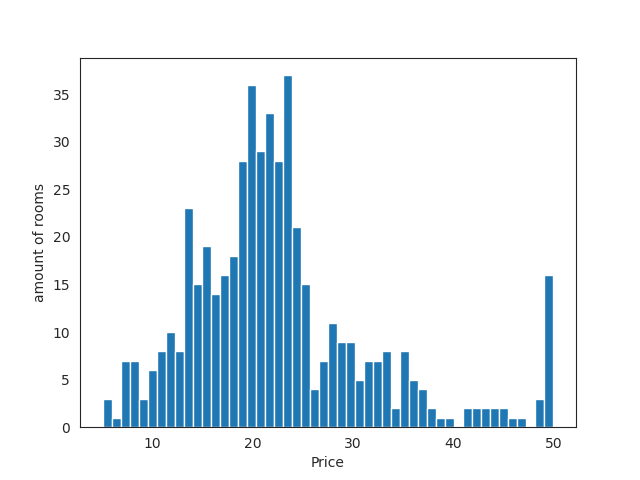

In [32]:
plt.figure()
plt.hist(data['PRICE'], bins=50)
plt.xlabel('Price')
plt.ylabel('amount of rooms')
plt.show()

In [27]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.2, random_state=10)

# Тренируем модель и расчитаем коэфициенты детерменации для тренировочной и тестовой выборки:
    - Коэффициент детерминации для модели с константой принимает значения от 0 до 1.
    - Чем ближе значение коэффициента к 1, тем сильнее зависимость. 
    1. коэффициент детерминации должен быть хотя бы не меньше 50 %.
    2. Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими.
    3. Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.

In [28]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.750121534530608
Test data r-squared:  0.6709339839115648
Intercepr 36.53305138282475


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [29]:
data['PRICE'].skew()
data['PRICE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [30]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

# Повышаем точность нашей модели:

In [33]:
data['PRICE'].skew()

1.1080984082549072

In [35]:
data['PRICE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [36]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [37]:
y_log.skew()

-0.33032129530987864

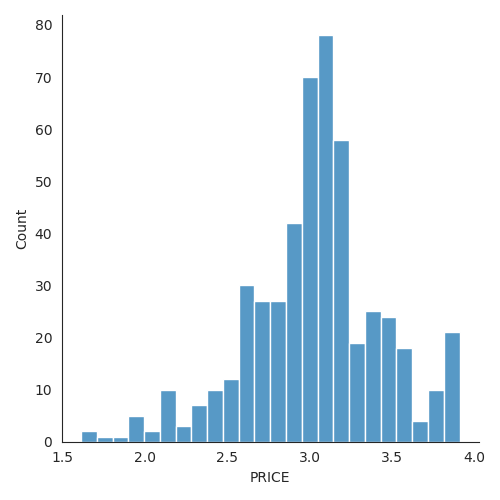

In [40]:
sns.displot(y_log)
plt.show()

In [43]:
prices = np.log(data['PRICE'])
feautures = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.7930234826697583
Test data r-squared:  0.7446922306260746
Intercepr 4.0599438717752045


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## Определим статистически важные параметры

p-value < 0.05

In [51]:
X_incl_const = sm.add_constant(X_train)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.7930234826697583
Test data r-squared:  0.7446922306260746
Intercepr 4.0599438717752045


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [48]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932492

In [59]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
       for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef name': X_incl_const.columns, 'vif':np.around(vif,2)})

,coef name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Оценим качество выборки по Байесу

In [68]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
original_coef = pd.DataFrame({'coef:':results.params, 'p-value':round(results.pvalues,3)})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC -139.7499776947892
r-squared 0.7930234826697583


In [67]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
reduced_coef = pd.DataFrame({'coef:':results.params, 'p-value':round(results.pvalues,3)})
print('BIC', results.bic)
print('r-squared', results.rsquared)

BIC -149.49934294224678
r-squared 0.7918657661852815


In [69]:
frames = [original_coef, reduced_coef]
pd.concat(frames, axis=1)

,coef:,p-value,coef:,p-value
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


# Визуализируем функцию потерь

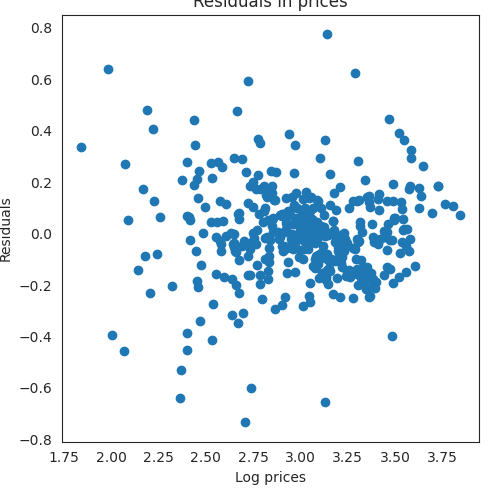

In [82]:
prices = np.log(data['PRICE'])
feautures = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=1)
plt.xlabel('Log prices')
plt.ylabel('Residuals')
plt.title('Residuals in prices')
plt.show()